In [1]:
# Import all modules
import time
import matplotlib.pyplot as plt
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.constraints import maxnorm
from keras.optimizers import SGD
from keras.layers import Activation
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from sklearn.metrics import accuracy_score
from keras import backend as K
if K.backend()=='tensorflow':
    K.set_image_dim_ordering("th")

# Import Tensorflow with multiprocessing
import tensorflow as tf
# import multiprocessing as mp

# Loading the CIFAR-10 datasets
from keras.datasets import cifar10

# fix random seed for reproducibility
np.random.seed(1010)

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170500096/170498071 [==============================] - 46s 0us/step


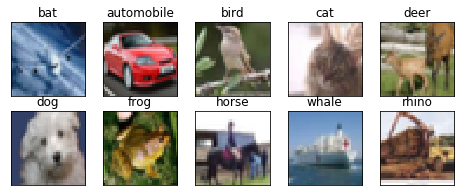

In [12]:
class_names = ['bat','automobile','bird','cat','deer',
               'dog','frog','horse','whale','rhino']

num_classes = len(class_names)

def visualize_classes():
    fig = plt.figure(figsize=(8,3))
    for i in range(num_classes):
        ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
        idx = np.where(y_train[:]==i)[0]
        features_idx = x_train[idx,::]
        img_num = np.random.randint(features_idx.shape[0])
        im = np.transpose(features_idx[img_num,::],(1,2,0))
        ax.set_title(class_names[i])
        plt.imshow(im)
    plt.show()

visualize_classes()

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [17]:
y_train = np_utils.to_categorical(y_train,num_classes)
y_test = np_utils.to_categorical(y_test,num_classes)

In [24]:
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),padding='same',input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(3,3),padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation(tf.nn.softmax))

In [28]:
sgd = SGD(lr=0.01,decay=1e-6,momentum=0.9,nesterov=True)
model.compile(loss='categorical_crossentropy',optimizer=sgd,metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_17 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 32, 30, 30)        9248      
_________________________________________________________________
activation_18 (Activation)   (None, 32, 30, 30)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 15, 15)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 32, 15, 15)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 15, 15)        18496     
__________

In [29]:
model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=10,batch_size=100)
scores = model.evaluate(x_test,y_test,verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 317s 6ms/step - loss: 1.8778 - acc: 0.3148 - val_loss: 1.5129 - val_acc: 0.4396
Epoch 2/10
50000/50000 [==============================] - 333s 7ms/step - loss: 1.4261 - acc: 0.4836 - val_loss: 1.2513 - val_acc: 0.5552
Epoch 3/10
50000/50000 [==============================] - 302s 6ms/step - loss: 1.2157 - acc: 0.5664 - val_loss: 1.1160 - val_acc: 0.6119
Epoch 4/10
50000/50000 [==============================] - 306s 6ms/step - loss: 1.0796 - acc: 0.6175 - val_loss: 0.9767 - val_acc: 0.6594
Epoch 5/10
50000/50000 [==============================] - 450s 9ms/step - loss: 0.9594 - acc: 0.6631 - val_loss: 0.8789 - val_acc: 0.6891
Epoch 6/10
50000/50000 [==============================] - 430s 9ms/step - loss: 0.8699 - acc: 0.6950 - val_loss: 0.8000 - val_acc: 0.7198
Epoch 7/10
50000/50000 [==============================] - 399s 8ms/step - 

In [30]:
y_predicts = model.predict_classes(x_test)
y_predicts

array([3, 8, 8, ..., 5, 4, 7])

In [32]:
y_test_argmax =np.argmax(y_test, axis=1)

In [36]:
total_count = len(y_test_argmax)
correct_count = 0
incorrect_count = 0
for num in range(len(y_test_argmax)-1):
    if y_test_argmax[num] == y_predicts[num]:
        correct_count += 1
    else:
        incorrect_count += 1
percentage_correct = correct_count/total_count
percentage_incorrect = incorrect_count/total_count
'The correct percentage of pictures is {}. And the percent incorrect is {}.'.format(percentage_correct*100,percentage_incorrect*100)

'The correct percentage of pictures is 75.27000000000001. And the percent incorrect is 24.72.'